# Introduction to problem

Autistic Spectrum Disorder (ASD) is a neurodevelopment  condition associated with significant healthcare costs, and early diagnosis can significantly reduce these. Unfortunately, waiting times for an ASD diagnosis are lengthy and procedures are not cost effective. The economic impact of autism and the increase in the number of ASD cases across the world reveals an urgent need for the development of easily implemented and effective screening methods. Therefore, a time-efficient and accessible ASD screening is imminent to help health professionals and inform individuals whether they should pursue formal clinical diagnosis.  The rapid growth in the number of ASD cases worldwide necessitates datasets related to behaviour traits. However, such datasets are rare making it difficult to perform thorough analyses to improve the efficiency, sensitivity, specificity and predictive accuracy of the ASD screening process. Presently, very limited autism datasets associated with clinical or screening are available and most of them are genetic in nature. Hence, we propose a new dataset related to autism screening of adults that contained 20 features to be utilised for further analysis especially in determining influential autistic traits and improving the classification of ASD cases. In this dataset, we record ten behavioural features (AQ-10-Adult) plus ten individuals characteristics that have proved to be effective in detecting the ASD cases from controls in behaviour science. 

# Import Libraries

In [530]:
import numpy as np
import pandas as pd
import seaborn as sns 
import scipy
from math import sqrt
from sklearn.svm import SVR, SVC
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import seaborn as sn
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing, tree
import sklearn.metrics as metrics
from sklearn.impute import SimpleImputer
from sklearn import preprocessing, neural_network, neighbors

## Preparation of data

Data is imported from csv.

In [531]:
dataset = pd.read_csv('Autism-Adult-Data.arff', index_col=None)

In [532]:
dataset

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,gender,ethnicity,jaundice,autism,country,used_app_before,result,age_desc,class,score
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2,18 and more,NaN,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7,18 and more,Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3,18 and more,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,NaN,no,no,Russia,no,7,18 and more,NaN,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,South Asian,no,no,Pakistan,no,6,18 and more,Self,NO


Converting and imputing data.

In [533]:
dataset['age'] = dataset['age'].fillna(dataset['age'].mean())

In [534]:

dataset["age"] = dataset["age"].astype(int)


In [535]:
dataset.fillna(method='ffill', inplace=True)

## Basic analysis of data

Score and results of screening tests:

In [536]:
dataset.groupby('score')['score'].count()

score
NO     515
YES    189
Name: score, dtype: int64

### Gender of people tested

/Users/raulbarrantes/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


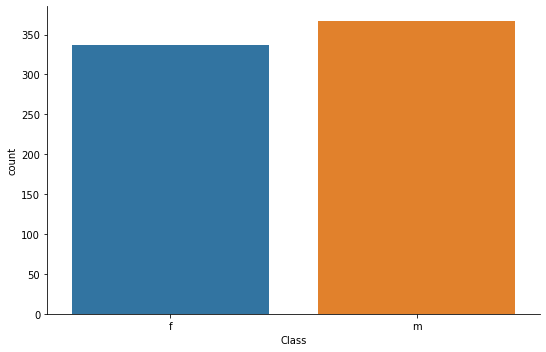

In [537]:
fg = sns.factorplot('gender', data=dataset, kind='count', aspect=1.5)
fg.set_xlabels('Class')

### Ethnicity of people tested

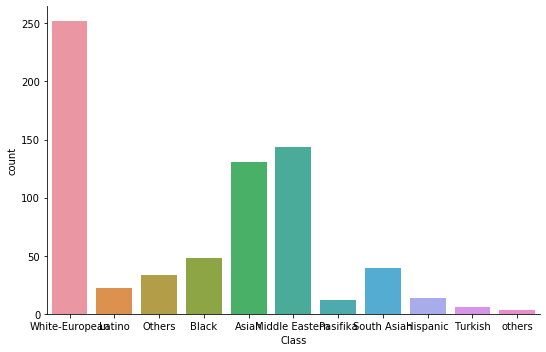

In [483]:
fg = sns.factorplot('ethnicity', data=dataset, kind='count', aspect=1.5)
fg.set_xlabels('Class')

### Country of people tested

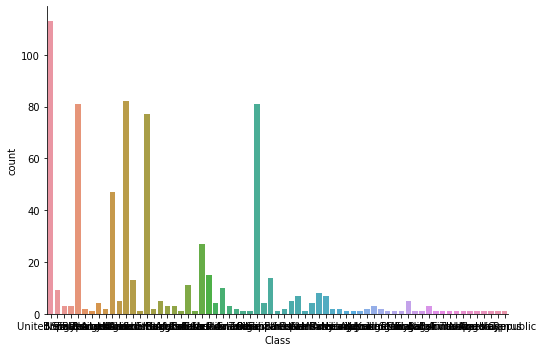

In [484]:
fg = sns.factorplot('country', data=dataset, kind='count', aspect=1.5)
fg.set_xlabels('Class')

### Who is completing the test

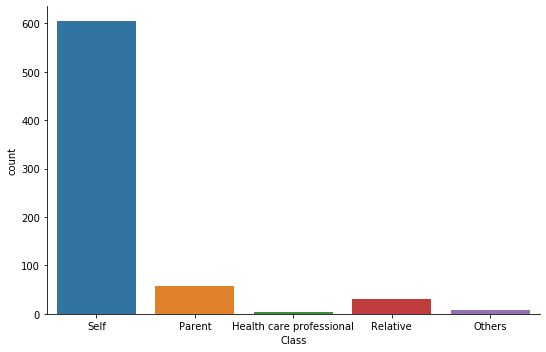

In [486]:
fg = sns.factorplot('class', data=dataset, kind='count', aspect=1.5)
fg.set_xlabels('Class')

### If the person is born with jaundice

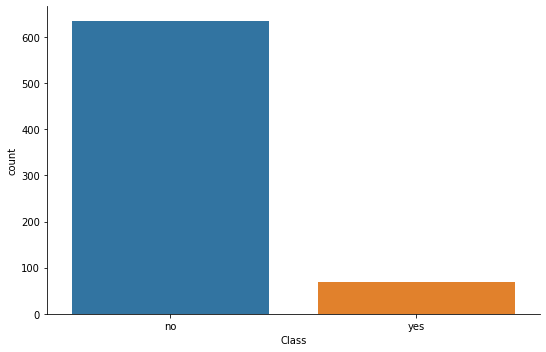

In [487]:
fg = sns.factorplot('jaundice', data=dataset, kind='count', aspect=1.5)
fg.set_xlabels('Class')

**Relation with final score:**

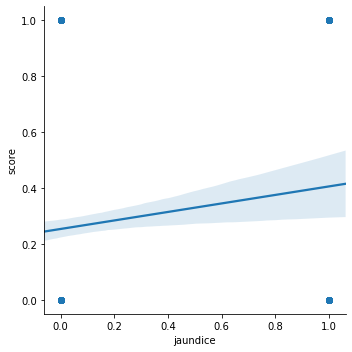

In [528]:
sns.lmplot('jaundice', 'score', data=dataset)

### If the person have family with autism

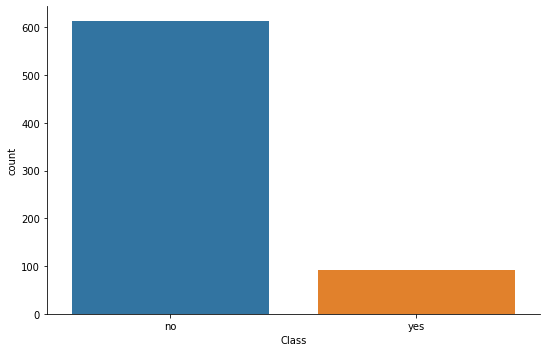

In [488]:
fg = sns.factorplot('autism', data=dataset, kind='count', aspect=1.5)
fg.set_xlabels('Class')

**Relation with final score:**

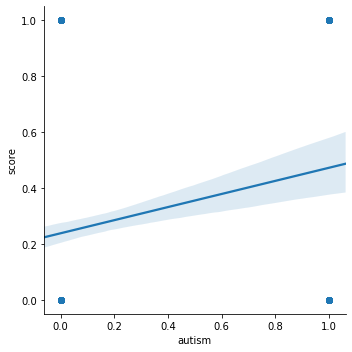

In [527]:
sns.lmplot('autism', 'score', data=dataset)

### Results of the screening

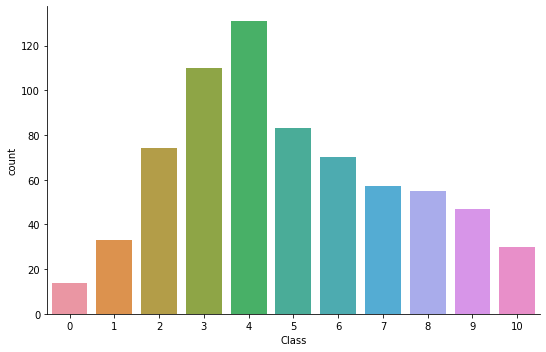

In [489]:
fg = sns.factorplot('result', data=dataset, kind='count', aspect=1.5)
fg.set_xlabels('Class')

### Age of the people tested

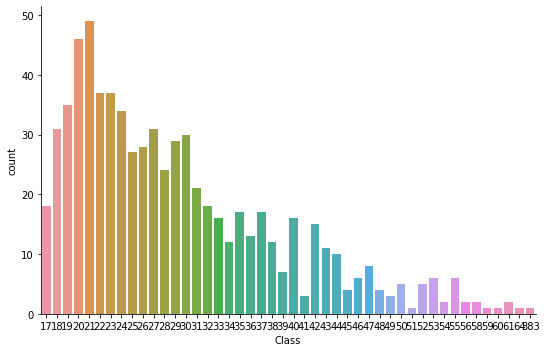

In [490]:
fg = sns.factorplot('age', data=dataset, kind='count', aspect=1.5)
fg.set_xlabels('Class')

### Score and results of tests

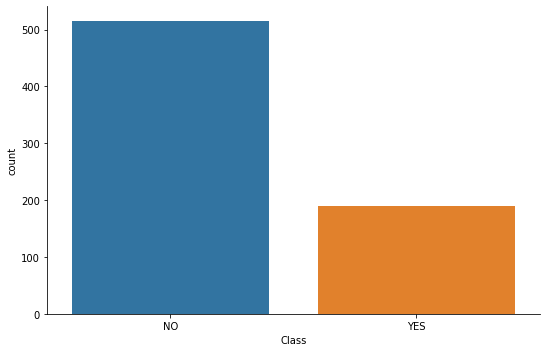

In [491]:
fg = sns.factorplot('score', data=dataset, kind='count', aspect=1.5)
fg.set_xlabels('Class')

## Proccesing of data

Deleting colums that may not be relevant for testing and training.

In [492]:
dataset = dataset.drop(columns=['class', 'age', 'result', 'country', 'age_desc', 'ethnicity'])

### Encoding of categorical data

Selecting categorical features and converting to data that can be trained.

In [496]:
categorical_feature_mask = dataset.dtypes==object

categorical_cols = dataset.columns[categorical_feature_mask].tolist()

In [497]:
categorical_cols

['gender', 'jaundice', 'autism', 'used_app_before', 'score']

Instantiating labelencoder object

In [498]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

Apply LabelEncoder on categorical feature columns

In [499]:
dataset[categorical_cols] = dataset[categorical_cols].apply(lambda col: le.fit_transform(col))
dataset[categorical_cols].head(10)

,gender,jaundice,autism,used_app_before,score
0,0,0,0,0,0
1,1,0,1,0,0
2,1,1,1,0,1
3,0,0,1,0,0
4,0,0,0,0,0
5,1,1,0,0,1
6,0,0,0,0,0
7,1,0,0,0,0
8,1,0,0,0,0
9,1,1,1,0,1


Splitting data between training and testing.

In [518]:
x = dataset.iloc[:,1:14]
y = dataset['score']
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.4)

In [519]:
xTrain

,A2,A3,A4,A5,A6,A7,A8,A9,A10,gender,jaundice,autism,used_app_before
237,0,0,0,0,0,0,0,0,1,1,0,0,0
311,0,1,1,1,0,0,1,0,0,1,1,0,0
347,0,0,0,0,0,0,1,0,0,1,0,0,0
635,1,1,0,0,0,1,0,0,1,1,0,0,0
6,1,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1,1,0,1,0,1,1,0,1,1,0,0,0
543,1,1,1,1,1,1,1,1,1,0,0,1,1
674,1,0,0,1,1,0,1,0,1,0,1,0,0
603,0,0,0,0,0,0,1,0,0,0,0,0,0


## Model creation

### Decision Tree

#### HyperParameters Search

In [520]:
hyperParams = {'min_samples_split': range(2,10)}


modelCV = GridSearchCV(tree.DecisionTreeClassifier(criterion='entropy'), 
                     hyperParams, cv=5, scoring='accuracy')

modelCV.fit(xTrain, yTrain)
print ("Best hyperparameters", modelCV.best_params_)
print ("\n\n")

Best hyperparameters {'min_samples_split': 3}





/Users/raulbarrantes/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### Training and Prediction

In [504]:
model = tree.DecisionTreeClassifier(min_samples_split = modelCV.best_params_['min_samples_split'])

model.fit(xTrain, yTrain)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### Accuracy

In [505]:
yPred=model.predict(xTest)
metrics.accuracy_score(yTest,yPred)


0.9361702127659575

### KNN

#### HyperParameters Search

In [506]:
hyperParams = {'n_neighbors': range(1,4), 
               'weights': ['uniform', 'distance']}
 
modelCV2 = GridSearchCV(neighbors.KNeighborsClassifier(), 
                     hyperParams, cv=5, scoring='neg_mean_squared_error')

modelCV2.fit(xTrain, yTrain)
print ("Best hyperparameters", modelCV2.best_params_)
print ("\n\n")


Best hyperparameters {'n_neighbors': 3, 'weights': 'uniform'}





#### Training and Prediction

In [507]:
model2 = neighbors.KNeighborsClassifier(n_neighbors= modelCV2.best_params_['n_neighbors'],
                                  weights= modelCV2.best_params_['weights'] )

model2.fit(xTrain, yTrain)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

#### Accuracy

In [508]:
yPred=model2.predict(xTest)
metrics.accuracy_score(yTest,yPred)

0.9539007092198581

### SVC

#### HyperParameters Search

In [523]:

hyperParams = {'C': np.arange(0.5, 2, 0.5)}

modelCV3 = GridSearchCV(SVC(kernel='rbf'), hyperParams, cv=5, scoring='neg_mean_squared_error')

modelCV3.fit(xTrain, yTrain)

print ("Best hyperparameters", modelCV3.best_params_)

Best hyperparameters {'C': 1.5}


/Users/raulbarrantes/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/raulbarrantes/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/raulbarrantes/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/raulbarrantes/anaconda3/

#### Training and Prediction

In [524]:
model3 = SVC(C = modelCV3.best_params_['C'])

model3.fit(xTrain, yTrain)


/Users/raulbarrantes/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

#### Accuracy

In [525]:
yPred=model3.predict(xTest)
metrics.accuracy_score(yTest,yPred)

0.9574468085106383

### Neural networks

#### HyperParameters Search

In [549]:
i=0
a=[]

while (i<=10):
    i=i+1
    s = (i,)
    a.append(s)
    

#Generate grid search
hyperParams = {'hidden_layer_sizes': a,
        'alpha': [0.0001, 0.001, 0.01]}


#Create an instance of Neighbors Classifier and fit the data for the grid parameters
modelCV4 = GridSearchCV(neural_network.MLPClassifier(activation='tanh', solver='lbfgs'), 
                     hyperParams, cv=5, scoring='neg_mean_squared_error')
modelCV4.fit(xTrain, yTrain)

/Users/raulbarrantes/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='tanh', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='lbfgs', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01],
        

In [550]:
print ("Best hyperparameters", modelCV4.best_params_)
print ("\n\n")

Best hyperparameters {'alpha': 0.001, 'hidden_layer_sizes': (5,)}





#### Training and Prediction

In [551]:
model4 = neural_network.MLPClassifier(activation='tanh', solver='lbfgs', hidden_layer_sizes= modelCV4.best_params_['hidden_layer_sizes'],
                                  alpha= modelCV4.best_params_['alpha'] )

model4.fit(xTrain, yTrain)


MLPClassifier(activation='tanh', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

#### Accuracy

In [552]:
yPred=model4.predict(xTest)
metrics.accuracy_score(yTest,yPred)

0.9858156028368794

The model with best results is **Neural networks** having **5 Hidden layers** and a value of **alpha** with **0.001**, with an accuracy of **95.74%** 